In [2]:
import pandas as pd
import numpy as np
import warnings
from src.category_classification.helper_methods import group_seismic_events, print_distribution, save_classification_dataset

warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)

In [4]:
DATA_CSV_PATH = "../data/raw/seismic_data.csv"

df = pd.read_csv(DATA_CSV_PATH)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (788820, 22)

First few rows:


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2000-06-30T23:32:26.660Z,44.2690,146.265000,72.900,4.9,mb,10.0,NaN,NaN,0.84,...,2014-11-07T01:10:26.358Z,"39 km NE of Otrada, Russia",earthquake,NaN,7.80,NaN,1.0,reviewed,us,us
1,2000-06-30T22:36:47.300Z,-39.2300,177.470000,36.000,3.4,ml,14.0,NaN,NaN,NaN,...,2014-11-07T01:10:26.356Z,"23 km SSE of Wairoa, New Zealand",earthquake,NaN,NaN,NaN,NaN,reviewed,wel,wel
2,2000-06-30T22:33:48.400Z,50.6660,6.124000,12.600,2.6,ml,8.0,NaN,NaN,NaN,...,2014-11-07T01:10:26.354Z,"0 km ESE of Raeren, Belgium",earthquake,NaN,NaN,NaN,NaN,reviewed,ldg,ldg
3,2000-06-30T22:19:02.440Z,46.7495,-122.806333,6.287,2.7,md,25.0,66.0,0.3629,0.19,...,2016-07-23T00:01:11.860Z,"7 km SE of Bucoda, Washington",explosion,0.028,0.11,0.03,5.0,reviewed,uw,uw
4,2000-06-30T20:33:42.010Z,37.3990,141.503000,42.100,5.4,mwc,216.0,NaN,NaN,0.90,...,2022-04-29T18:43:13.619Z,"45 km ESE of Namie, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv


In [5]:
print(type(df['type']))
print(type(df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
print("\nTarget Variable Distribution:")
print(df['type'].value_counts())
print(f"\nNumber of unique event types: {df['type'].nunique()}")


Target Variable Distribution:
type
earthquake                781685
explosion                   4272
mining explosion            2201
ice quake                    208
rock burst                   134
other event                  119
volcanic eruption             93
quarry blast                  59
mine collapse                 14
nuclear explosion             11
experimental explosion         9
sonic boom                     6
landslide                      3
Landslide                      2
acoustic noise                 1
Rock Slide                     1
collapse                       1
Ice Quake                      1
Name: count, dtype: int64

Number of unique event types: 18


In [7]:
print("Creating grouped classification target...")
df['type_grouped'] = df['type'].apply(group_seismic_events)

print_distribution(df, 'type_grouped')

Creating grouped classification target...



Distribution for 'type_grouped':
earthquake: 781,685 (99.10%)
explosion: 6,552 (0.83%)
natural_event: 221 (0.03%)
mining_activity: 148 (0.02%)
other: 121 (0.02%)
volcanic: 93 (0.01%)


In [8]:
df_earthquakes = df[df['type_grouped'] == 'earthquake']
df_non_earthquakes = df[df['type_grouped'] != 'earthquake']

print(f"\nOriginal earthquake samples: {len(df_earthquakes):,}")
print(f"Non-earthquake samples: {len(df_non_earthquakes):,}")

df_earthquakes_sampled = df_earthquakes.sample(n=10000, random_state=42)

print(f"Sampled earthquake samples: {len(df_earthquakes_sampled):,}")

df_balanced = pd.concat([df_earthquakes_sampled, df_non_earthquakes], ignore_index=True)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nTotal samples after downsampling: {len(df_balanced):,}")




Original earthquake samples: 781,685
Non-earthquake samples: 7,135
Sampled earthquake samples: 10,000

Total samples after downsampling: 17,135


In [9]:
print_distribution(df_balanced, 'type_grouped')


Distribution for 'type_grouped':
earthquake: 10,000 (58.36%)
explosion: 6,552 (38.24%)
natural_event: 221 (1.29%)
mining_activity: 148 (0.86%)
other: 121 (0.71%)
volcanic: 93 (0.54%)


CREATING CLASSIFICATION DATASET

------------------------------------------------------------
BINARY TARGET DISTRIBUTION
------------------------------------------------------------
target_binary
0     7135
1    10000
Name: count, dtype: int64

Detailed breakdown:
  0 (non-earthquake): 7,135 samples (41.64%)
  1 (earthquake):     10,000 samples (58.36%)

------------------------------------------------------------
MULTICLASS TARGET DISTRIBUTION
------------------------------------------------------------
                 count  class_id
type_grouped                    
earthquake       10000         0
explosion         6552         1
natural_event      221         2
mining_activity    148         3
other              121         4
volcanic            93         5

Detailed breakdown:
  0 (earthquake): 10,000 samples (58.36%)
  1 (explosion): 6,552 samples (38.24%)
  2 (natural_event): 221 samples (1.29%)
  3 (mining_activity): 148 samples (0.86%)
  4 (other): 121 samples (0.71%)
  5 (v

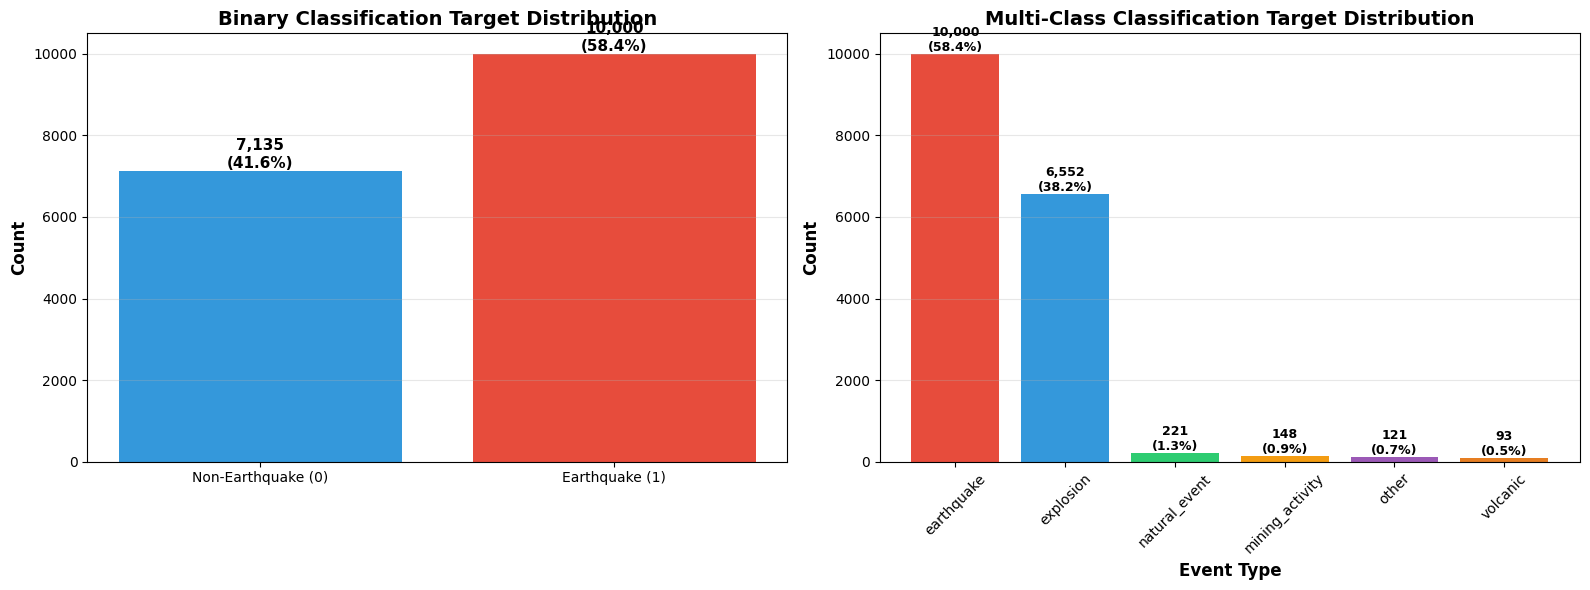


SAVING DATASET
Dataset saved to: ../data/raw/final_seismic_data.csv
Total rows: 17,135

Columns saved:
  - target_binary: Binary classification (0=non-earthquake, 1=earthquake)
  - target_multiclass: Multi-class classification (0-5)
  - type_grouped: Original event type names
  - Features: mag, depth, nst, gap, longitude, latitude
  - id: Sample identifier

SAMPLE DATA (first 10 rows)
 target_binary  target_multiclass type_grouped  mag  depth  nst   gap   longitude  latitude            id
             0                  1    explosion 3.10  0.000  NaN  33.0 -105.279200 43.782800    usc000tk6r
             0                  1    explosion 2.70  0.000 10.0 118.0 -105.348200 43.784100    us6000j9s0
             1                  0   earthquake 2.91 10.000  6.0 317.0  -67.296800 19.245100  pr2019273033
             0                  1    explosion 3.20  0.000 30.0  70.6 -105.194000 43.805000 rusms00004827
             1                  0   earthquake 2.53  3.743 80.0  53.0 -120.917167

In [10]:
df_binary = save_classification_dataset(
    df_balanced, 
    output_path="../data/raw/final_seismic_data.csv"
)